<a href="https://colab.research.google.com/github/pablex72/research-camp-time-ser/blob/main/adv2_determining_phases_of_NDVI_good.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sowing Points: []
Heading Points: ['12/21/2021']
Maturity Points: ['2/4/2022']
Tillering Points: ['11/1/2021']


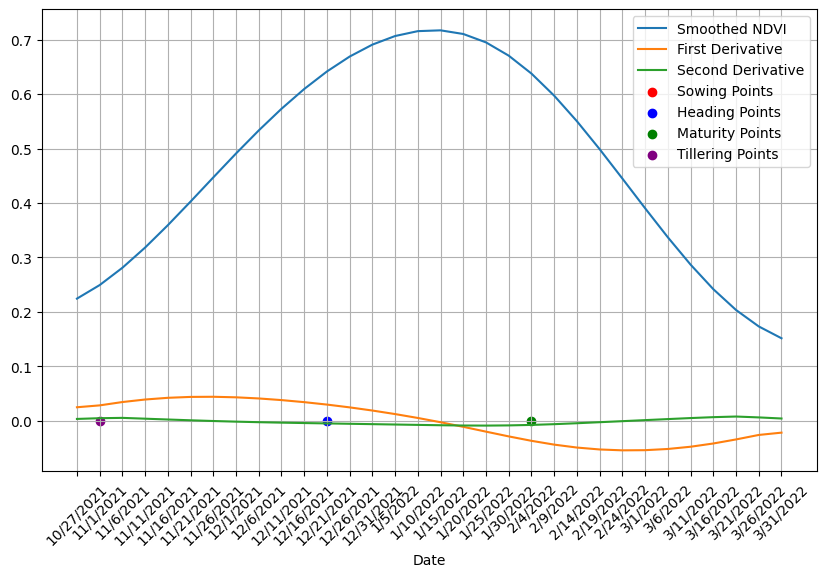

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Your NDVI data
dates = [
    "10/7/2021", "10/12/2021", "10/17/2021", "10/22/2021", "10/27/2021",
    "11/1/2021", "11/6/2021", "11/11/2021", "11/16/2021", "11/21/2021",
    "11/26/2021", "12/1/2021", "12/6/2021", "12/11/2021", "12/16/2021",
    "12/21/2021", "12/26/2021", "12/31/2021", "1/5/2022", "1/10/2022",
    "1/15/2022", "1/20/2022", "1/25/2022", "1/30/2022", "2/4/2022",
    "2/9/2022", "2/14/2022", "2/19/2022", "2/24/2022", "3/1/2022",
    "3/6/2022", "3/11/2022", "3/16/2022", "3/21/2022", "3/26/2022", "3/31/2022"
]

ndvi = [
    0.189841057, 0.197970454, 0.215976642, 0.242361606, 0.27562733,
    0.314275798, 0.356808995, 0.401728906, 0.447537515, 0.492736806,
    0.535966232, 0.576415109, 0.613410221, 0.646278352, 0.674346288,
    0.69694081, 0.713388705, 0.723016755, 0.725151746, 0.71912046,
    0.704249682, 0.679866197, 0.645726788, 0.603308242, 0.554517343,
    0.501260879, 0.445445636, 0.388978398, 0.333765954, 0.281715087,
    0.234732585, 0.194725233, 0.163599818, 0.142651881, 0.130731988, 0.12607946
]

# Smoothing the data using a moving average
window_size = 5
smoothed_ndvi = np.convolve(ndvi, np.ones(window_size)/window_size, mode='valid')

# Compute the first and second derivatives
first_derivative = np.gradient(smoothed_ndvi)
second_derivative = np.gradient(first_derivative)

# Find zero crossings in derivatives
first_derivative_zero_crossings = np.where(np.diff(np.sign(first_derivative)))[0]
second_derivative_zero_crossings = np.where(np.diff(np.sign(second_derivative)))[0]

# Define threshold values for classification
sowing_threshold = 0
heading_threshold = 0
maturity_threshold = 0
tillering_threshold = 0

# Identify points
sowing_points = [dates[i] for i in first_derivative_zero_crossings if first_derivative[i] < sowing_threshold]
heading_points = [dates[i] for i in first_derivative_zero_crossings if first_derivative[i] > heading_threshold]
maturity_points = [dates[i] for i in second_derivative_zero_crossings if second_derivative[i] < maturity_threshold]
tillering_points = [dates[i] for i in second_derivative_zero_crossings if second_derivative[i] > tillering_threshold]

# Print and plot the results
print("Sowing Points:", sowing_points)
print("Heading Points:", heading_points)
print("Maturity Points:", maturity_points)
print("Tillering Points:", tillering_points)

plt.figure(figsize=(10, 6))
plt.plot(dates[window_size - 1:], smoothed_ndvi, label='Smoothed NDVI')
plt.plot(dates[window_size - 1:], first_derivative, label='First Derivative')
plt.plot(dates[window_size - 1:], second_derivative, label='Second Derivative')
plt.scatter(sowing_points, [0] * len(sowing_points), c='red', label='Sowing Points', marker='o')
plt.scatter(heading_points, [0] * len(heading_points), c='blue', label='Heading Points', marker='o')
plt.scatter(maturity_points, [0] * len(maturity_points), c='green', label='Maturity Points', marker='o')
plt.scatter(tillering_points, [0] * len(tillering_points), c='purple', label='Tillering Points', marker='o')

plt.xlabel('Date')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


Sowing Points: []
Heading Points: ['12/21/2021']
Maturity Points: ['2/4/2022']
Tillering Points: ['11/1/2021']


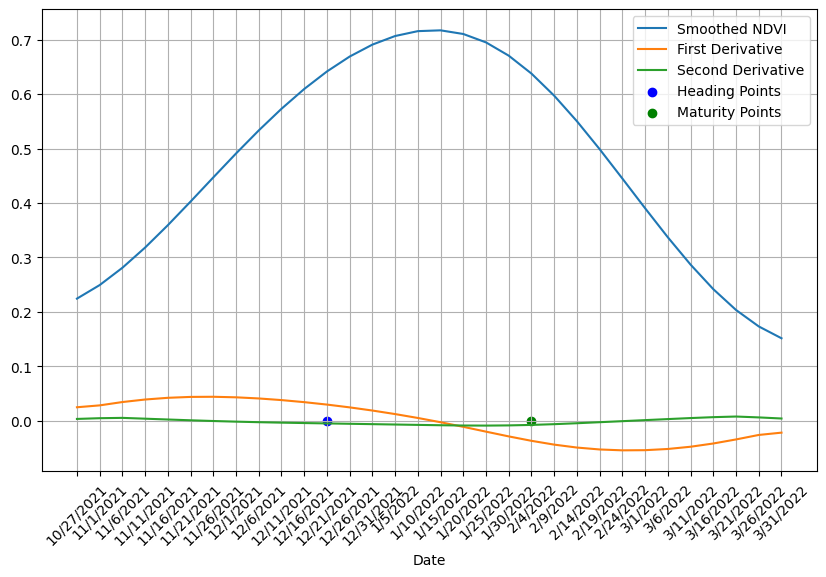

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Your NDVI data
dates = [
    "10/7/2021", "10/12/2021", "10/17/2021", "10/22/2021", "10/27/2021",
    "11/1/2021", "11/6/2021", "11/11/2021", "11/16/2021", "11/21/2021",
    "11/26/2021", "12/1/2021", "12/6/2021", "12/11/2021", "12/16/2021",
    "12/21/2021", "12/26/2021", "12/31/2021", "1/5/2022", "1/10/2022",
    "1/15/2022", "1/20/2022", "1/25/2022", "1/30/2022", "2/4/2022",
    "2/9/2022", "2/14/2022", "2/19/2022", "2/24/2022", "3/1/2022",
    "3/6/2022", "3/11/2022", "3/16/2022", "3/21/2022", "3/26/2022", "3/31/2022"
]

ndvi = [
    0.189841057, 0.197970454, 0.215976642, 0.242361606, 0.27562733,
    0.314275798, 0.356808995, 0.401728906, 0.447537515, 0.492736806,
    0.535966232, 0.576415109, 0.613410221, 0.646278352, 0.674346288,
    0.69694081, 0.713388705, 0.723016755, 0.725151746, 0.71912046,
    0.704249682, 0.679866197, 0.645726788, 0.603308242, 0.554517343,
    0.501260879, 0.445445636, 0.388978398, 0.333765954, 0.281715087,
    0.234732585, 0.194725233, 0.163599818, 0.142651881, 0.130731988, 0.12607946
]

# Smoothing the data using a moving average
window_size = 5
smoothed_ndvi = np.convolve(ndvi, np.ones(window_size)/window_size, mode='valid')

# Compute the first and second derivatives
first_derivative = np.gradient(smoothed_ndvi)
second_derivative = np.gradient(first_derivative)

# Find zero crossings in derivatives
first_derivative_zero_crossings = np.where(np.diff(np.sign(first_derivative)))[0]
second_derivative_zero_crossings = np.where(np.diff(np.sign(second_derivative)))[0]

# Define threshold values for classification
sowing_threshold = 0
heading_threshold = 0
maturity_threshold = 0
tillering_threshold = 0

# Identify points
sowing_points = [dates[i] for i in first_derivative_zero_crossings if first_derivative[i] < sowing_threshold]
heading_points = [dates[i] for i in first_derivative_zero_crossings if first_derivative[i] > heading_threshold]
maturity_points = [dates[i] for i in second_derivative_zero_crossings if second_derivative[i] < maturity_threshold]
tillering_points = [dates[i] for i in second_derivative_zero_crossings if second_derivative[i] > tillering_threshold]

# Print and plot the results
print("Sowing Points:", sowing_points)
print("Heading Points:", heading_points)
print("Maturity Points:", maturity_points)
print("Tillering Points:", tillering_points)

plt.figure(figsize=(10, 6))
plt.plot(dates[window_size - 1:], smoothed_ndvi, label='Smoothed NDVI')
plt.plot(dates[window_size - 1:], first_derivative, label='First Derivative')
plt.plot(dates[window_size - 1:], second_derivative, label='Second Derivative')
#plt.scatter(sowing_points, [0] * len(sowing_points), c='red', label='Sowing Points', marker='o')
plt.scatter(heading_points, [0] * len(heading_points), c='blue', label='Heading Points', marker='o')
plt.scatter(maturity_points, [0] * len(maturity_points), c='green', label='Maturity Points', marker='o')
##plt.scatter(tillering_points, [0] * len(tillering_points), c='purple', label='Tillering Points', marker='o')

plt.xlabel('Date')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()
